# MSA 2024 Phase 2 - Part 2

In [8]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
%matplotlib inline

## 1. Load and split preprocessed data

1. **Load data**: first load the dataset `final_features_data.csv` to get the processed features and target variables.
2. **DATA DESCRIPTION**: print the data types to ensure that each feature is of the correct type for further processing.
3. **Split Features and Target Variables**: split the dataset into features (`X`) and target variables (`y`) for model training.
4. **Split Training and Test Sets**: Split the dataset into training and test sets for training and evaluating the model. The training set is 70% and the test set is 30%, and a random seed `101` is set to ensure reproducible results.
5. **Print dataset size**: print the sample size of the training set and test set to verify that the split operation is correct.


In [3]:
# Load feature data
file_path = 'final_features_data.csv'
final_features_df = pd.read_csv(file_path)

# Data description
print("Data Types of Selected Features:")
print(final_features_df.dtypes)

# Split the data into features and target label
X = final_features_df.drop(columns=['Sales'])
y = final_features_df['Sales']

# Use train_test_split to split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Print the results of the train_test_split
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Data Types of Selected Features:
Sales                       float64
Profit                      float64
City_Fresno                 float64
City_Buffalo                float64
Quantity                    float64
Sub-Category_Furnishings    float64
Sales_lag_1                 float64
Sales_lag_9                 float64
Sales_lag_12                float64
Sales_lag_7                 float64
dtype: object
Training set size: 1820 samples
Test set size: 780 samples


## 2. Choose an algorithm

We chose the XGBoost model for future sales prediction. XGBoost, known as eXtreme Gradient Boosting, is a tree-based regression model. It forms a stronger predictor by integrating many tree models together.The core of XGBoost is gradient boosting, where each new decision tree is trained based on the prediction residuals of the previous tree, constantly correcting the former's errors and gradually improving the overall performance of the model through constant iteration.

Although essentially different, the idea of XGBoost is similar to that of recurrent neural networks (RNNs) in deep learning in that they both rely on the results of the previous step to improve model performance. Thus, by optimising each tree step by step, XGBoost is able to effectively capture complex patterns in the data, improve prediction accuracy, and effectively prevent overfitting, which allows it to perform well in regression tasks.

In sales prediction, XGBoost has the following advantages:

1. **High prediction accuracy**: by integrating multiple weak learners (decision trees), XGBoost is able to capture complex patterns and non-linear relationships in sales data, thus improving prediction accuracy.
   
2. **Handling of Missing Values**: XGBoost is able to automatically handle missing values in data, reducing the complexity of data preprocessing and maintaining data integrity.

3. **Efficient Parallel Computing**: XGBoost supports parallel computing, which can efficiently process large-scale sales data and significantly improve training speed.

4. **Prevention of overfitting**: The built-in regularisation and early stopping mechanisms help XGBoost to prevent model overfitting and improve generalisation while maintaining high prediction accuracy.

5. **Flexibility and Customisation**: Supports a wide range of objective functions and evaluation metrics that can be optimally configured according to specific sales forecasting needs.

6. **Feature Importance Analysis**: XGBoost is able to calculate feature importance, helping to identify the factors that have the most impact on sales forecasting, so as to optimise marketing strategies.

## 3. Train and test a model

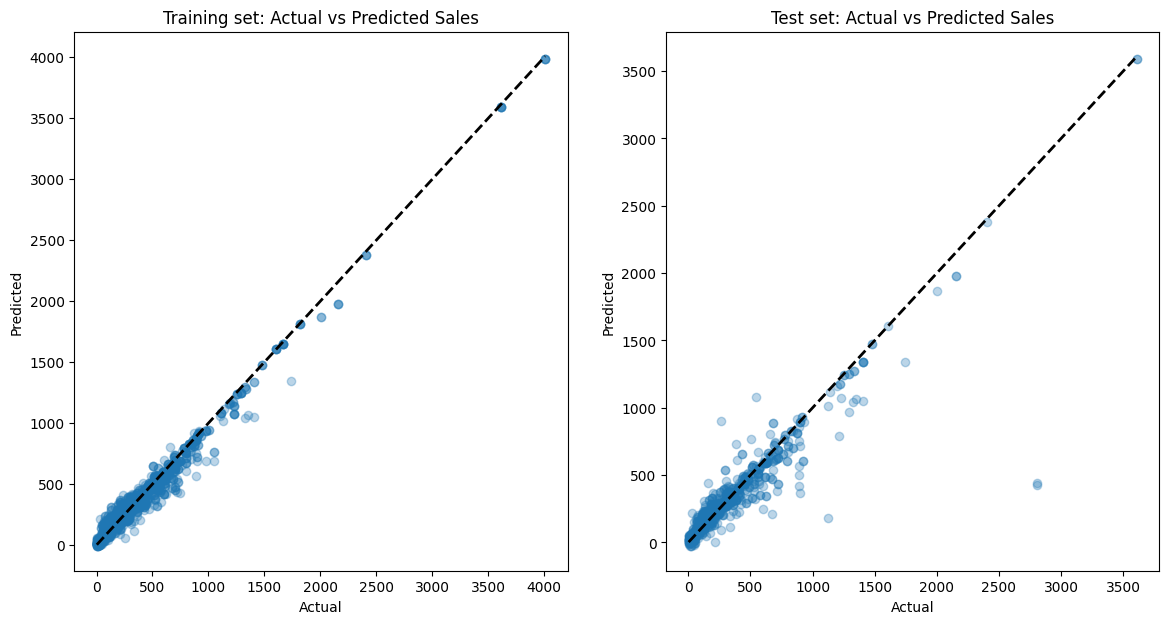

In [4]:
# Import the XGBoost Regressor
from xgboost import XGBRegressor

# Train the model
model = XGBRegressor(random_state=101, n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Predict the sales
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Draw the comparison between actual and predicted sales
plt.figure(figsize=(14, 7))

# Training set comparison chart
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training set: Actual vs Predicted Sales')

# Test set comparison chart
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test set: Actual vs Predicted Sales')

plt.show()

**Training Set**:
- The model performs very well on the training set.
- The predicted values are highly consistent with the actual values, indicating that the model fits the training data well.

**Test Set**:
- The model performs slightly worse on the test set compared to the training set.
- Most of the predicted values are close to the actual values, although there is more variability compared to the training set.

**Overall**:
- The model performs well overall, showing good predictive accuracy on both the training and test sets.

## 4. Evaluate the model 

In [11]:




# 评估模型
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# 打印评估结果
print(f"Training RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Training R2: {train_r2}")
print(f"Test R2: {test_r2}")
print(f"Training MAPE: {train_mape}")
print(f"Test MAPE: {test_mape}")
print(f"Training MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")


Training RMSE: 58.81601933606446
Test RMSE: 154.73435260487807
Training R2: 0.9790381223394079
Test R2: 0.8371301407577109
Training MAPE: 0.3084999671906522
Test MAPE: 0.3906422588478487
Training MAE: 38.55440480766195
Test MAE: 61.77553640483147
Training MSE: 3459.3241305403085
Test MSE: 23942.719876050734


C:\Users\chenz\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\chenz\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- **Training RMSE: 58.82**
- **Test RMSE: 154.73**
  - **Explanation**: RMSE is used to measure the standard deviation between predicted and actual values. The large RMSE values on the test set indicate that the generalisation of the model needs to be improved.

- **Training R²: 0.979**
- **Test R²: 0.837**
  - **Explanation**: R² is used to measure how well the model explains the variables and has a value between 0 and 1. A training set R² of 0.979 means that the model explains 97.9% of the variance in the training data. A test set R² of 0.837 means that the model explains 83.7% of the variance in the test data.

- **Training MAPE: 0.308**
- **Test MAPE: 0.391**
  - **Explanation**: MAPE measures the relative error between the predicted and actual values and represents the mean absolute percentage error. The MAPE of the training set is 0.308 and the MAPE of the test set is 0.391, which means that the relative error of the model on the test set is higher than that on the training set.

- **Training MAE: 38.55**
- **Test MAE: 61.78**
  - **Explanation**: MAE is used to measure the average absolute difference between predicted and actual values, giving equal weight to all error values. The MAE of the training set is 38.55 and the MAE of the test set is 61.78, indicating that the average prediction error of the model on the test set is significantly higher than that on the training set.

- **Training MSE: 3459.32**
- **Test MSE: 23942.72**
  - **Explanation**: MSE is used to measure the average squared difference between predicted and actual values and is more sensitive to large errors. The training set MSE is 3459.32 and the test set MSE is 23942.72, again showing that the model's prediction error on the test set is much higher than on the training set, suggesting that the model performs poorly on high error samples.

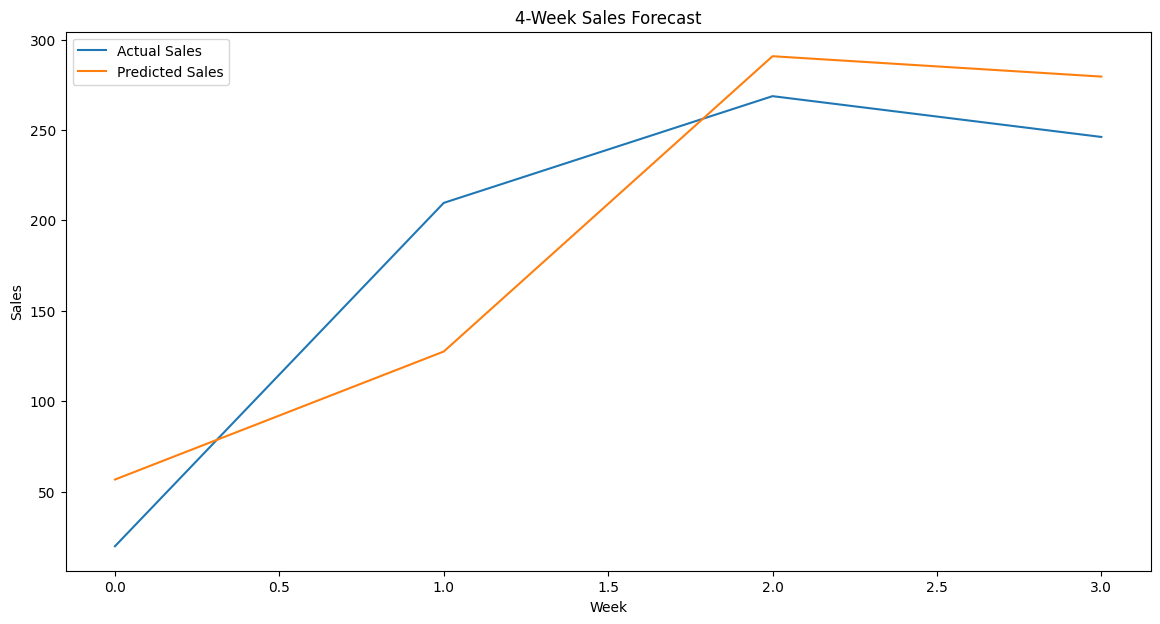

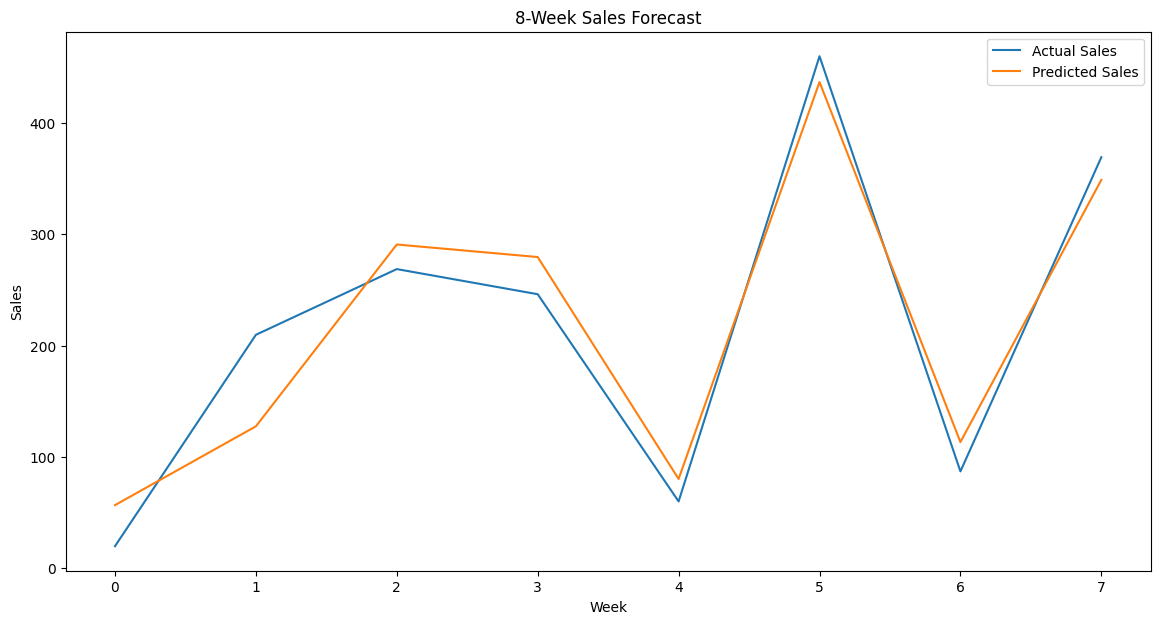

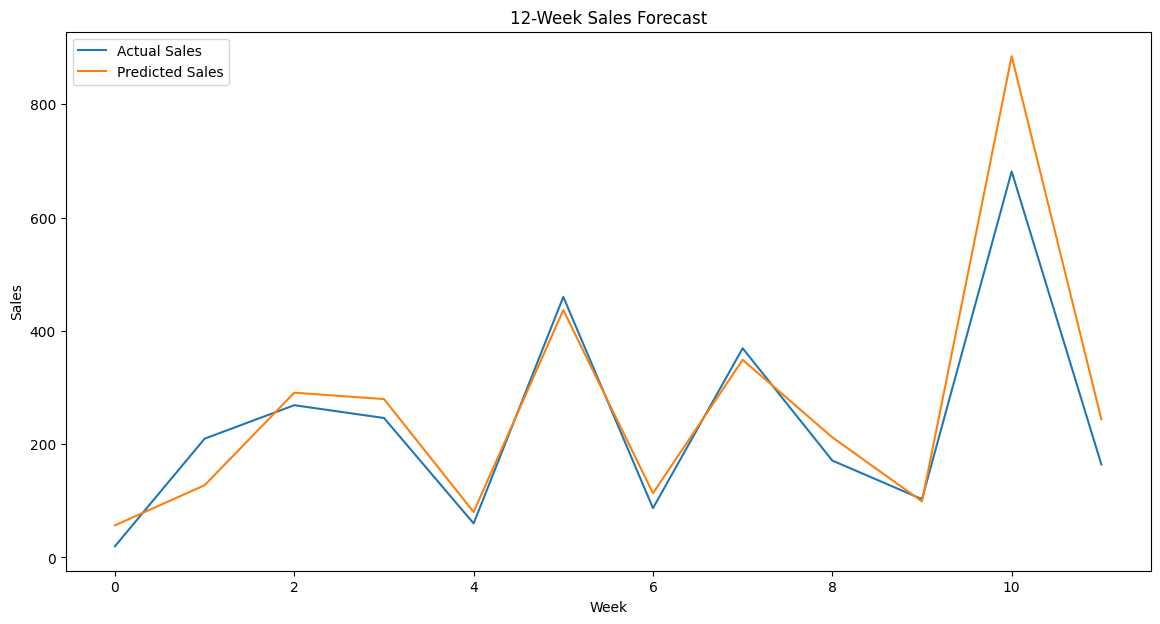

In [12]:
# Evaluation of the 4-week forecast
def plot_week_forecast(actual, predicted, weeks=4):
    plt.figure(figsize=(14, 7))
    plt.plot(pd.Series(actual[:weeks]).reset_index(drop=True), label='Actual Sales')
    plt.plot(pd.Series(predicted[:weeks]).reset_index(drop=True), label='Predicted Sales')
    plt.xlabel('Week')
    plt.ylabel('Sales')
    plt.title(f'{weeks}-Week Sales Forecast')
    plt.legend()
    plt.show()

# Predicting the first 4 weeks of the test set
plot_week_forecast(y_test, y_test_pred, weeks=4)



# Evaluation of the 8-week forecast
def plot_week_forecast(actual, predicted, weeks=8):
    plt.figure(figsize=(14, 7))
    plt.plot(pd.Series(actual[:weeks]).reset_index(drop=True), label='Actual Sales')
    plt.plot(pd.Series(predicted[:weeks]).reset_index(drop=True), label='Predicted Sales')
    plt.xlabel('Week')
    plt.ylabel('Sales')
    plt.title(f'{weeks}-Week Sales Forecast')
    plt.legend()
    plt.show()

# Predicting the first 8 weeks of the test set
plot_week_forecast(y_test, y_test_pred, weeks=8)

# Evaluation of the 12-week forecast
def plot_week_forecast(actual, predicted, weeks=12):
    plt.figure(figsize=(14, 7))
    plt.plot(pd.Series(actual[:weeks]).reset_index(drop=True), label='Actual Sales')
    plt.plot(pd.Series(predicted[:weeks]).reset_index(drop=True), label='Predicted Sales')
    plt.xlabel('Week')
    plt.ylabel('Sales')
    plt.title(f'{weeks}-Week Sales Forecast')
    plt.legend()
    plt.show()

# Predicting the first 12 weeks of the test set
plot_week_forecast(y_test, y_test_pred, weeks=12)

Conclusion for prediction
1. **Overall trend prediction**: The model captures the overall trend in sales well, showing the ability to learn from time-series data.
2. **Short-term forecast**: the four-week forecast has deviations in specific values, but the overall trend is accurate, and the ability to make specific forecasts in the short term needs to be improved.
3. **Medium-term forecast**: The eight-week forecast performs well, with the predicted values basically in line with the actual values, especially in the first five weeks and the seventh week, with better stability of the model.
4. **Long-term forecast**: The twelve-week forecast is able to capture the trend of sales fluctuation, but there is a bias in the forecast of extreme values, and further optimisation is needed to handle extreme values.

Overall Performance
- **The model performs well in the test set**: although there are deviations in some peaks and troughs, it is able to capture the sales trend accurately in general, especially in the mid-term forecast.

## 5. Summary

We begin the training and evaluation steps by loading the preprocessed dataset with `Sales` feature separation as the target variable. The dataset is divided into a training set (70%) and a test set (30%) to ensure that the amount of training data is sufficient to adequately train the model. In addition, the random number generator seed was set to 101 to ensure reproducible and controllable results.

#### Model Selection

We chose to use the XGBoost model, which is a recursive boosting decision tree model that improves the model performance by iteratively optimising the results of the previous tree, and is suitable for handling complex regression tasks. The model parameters are set as follows: number of decision trees `n_estimators=100`, learning rate `learning_rate=0.1`.

#### Training and Prediction

The segmented training set is fed into the model for training and then prediction is performed on the training and test sets to fully evaluate the model performance. Plotting the comparison between real and predicted sales, it is found that the model performs well on the training set but in the test set, there is a bias in the high sales section, which may be due to overfitting of the model.

#### Model Evaluation
The model was evaluated comprehensively using the metrics RMSE, R², MAPE, MAE and MSE. The results are shown:
- **Training set**: the model performs very well, showing high accuracy and low error, indicating that the model fits the training data well.
- **Test set**: the performance is poor, with all the evaluated values showing high error and low accuracy, especially RMSE and MSE, indicating that the model performs poorly on high error samples, and that there may be an overfitting problem, i.e., the model relies too much on the details and noise in the training data, which leads to a lack of generalisation ability on new data.

#### Analysis of Prediction Results

We used the test set to predict sales for 4, 8, and 12 weeks. The result graph shows that the prediction curve is closer to the actual sales curve with less fluctuation, indicating that the model performs well in actual prediction.

#### Conclusion and Optimisation Suggestions

In summary, we used the XGBoost model to train and comprehensively evaluate the dataset after feature selection. Although the model performs well on the training set, it performs relatively poorly on the test set, possibly due to model overfitting. To optimise the model, the following strategies are suggested:

1. **Increase regularisation**: introduce or increase regularisation terms to reduce model complexity and prevent overfitting.
2. **Adjust the learning rate and the number of trees**: reduce the learning rate while increasing the number of trees to make the model more robust and reduce the risk of overfitting.
3. **Cross-validation**: Select the best model parameters through cross-validation to ensure that the model performs well on both the training and validation sets.
4. **Feature Engineering**: Re-evaluate the importance of features, remove unnecessary features or add useful features to further optimise model performance.
5. **Integrated Learning**: use a mixture of other models (e.g. LSTM) to improve prediction of extreme values.
